EV HypothesisTesting

En esta actividad vamos a realizar un análisis de unos datos sobre los equipos de futbol de las 5 principales liagas.
Para comenzar importamos las librerías que se van a usar y cargamos el archivo CSV para ver que contiene. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pingouin import ttest
from pingouin import anova

df_big5leagues = pd.read_csv("futbol.csv")
df_big5leagues.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Napoli,it ITA,1,25,21,2,2,58,16,...,65,2.60,46.9,20.0,26.9,1.08,W W W W L,32077,Victor Osimhen - 19,Alex Meret
1,2,Barcelona,es ESP,1,24,20,2,2,46,8,...,62,2.58,48.2,19.6,28.7,1.19,W W W L W,82492,Robert Lewandowski - 15,Marc-André ter Stegen
2,3,Paris S-G,fr FRA,1,26,20,3,3,66,25,...,63,2.42,56.2,30.9,25.3,0.97,W L W W W,42615,Kylian Mbappé - 18,Gianluigi Donnarumma
3,4,Arsenal,eng ENG,1,26,20,3,3,59,25,...,63,2.42,50.3,25.4,24.9,0.96,L W W W W,60196,Martinelli - 11,Aaron Ramsdale
4,5,Manchester City,eng ENG,2,26,18,4,4,66,25,...,58,2.23,54.1,21.3,32.7,1.26,W W D W W,53219,Erling Haaland - 27,Ederson


Con estos datos podemos responder a varias preguntas sobre los equipos y sus ligas.

- La liga italiana ha tenido fama de defensiva, creo que se meten menos de dos goles de media por partido.

Para responder esta pregunta primero creamos una columna en los datos que contiene el numero de goles de media por partido, para cada equipo.
Con esto podemos mostrar un boxplot con las medias de goles, y calcular las medias para todos los equipos según su liga.

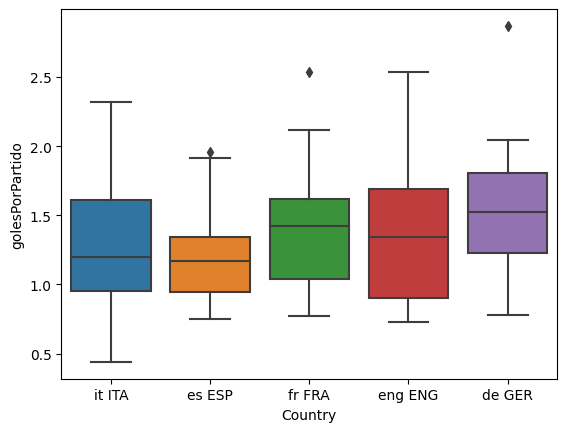

Country
de GER     1.579710
eng ENG    1.356728
es ESP     1.210417
fr FRA     1.419231
it ITA     1.258000
Name: golesPorPartido, dtype: float64


In [3]:
df_big5leagues['golesPorPartido'] = df_big5leagues.GF/ df_big5leagues.MP
df_big5leaguesES = df_big5leagues[df_big5leagues["Country"] == "es ESP"]['golesPorPartido']
df_big5leaguesITA = df_big5leagues[df_big5leagues["Country"] == "it ITA"]['golesPorPartido']
sns.boxplot(x="Country",y="golesPorPartido",data=df_big5leagues)
plt.show()

df_avgGoalsCountry = df_big5leagues.groupby("Country")["golesPorPartido"].mean()
print(df_avgGoalsCountry)

Podemos mostrar las mismas visualizaciones con los goles encajados.

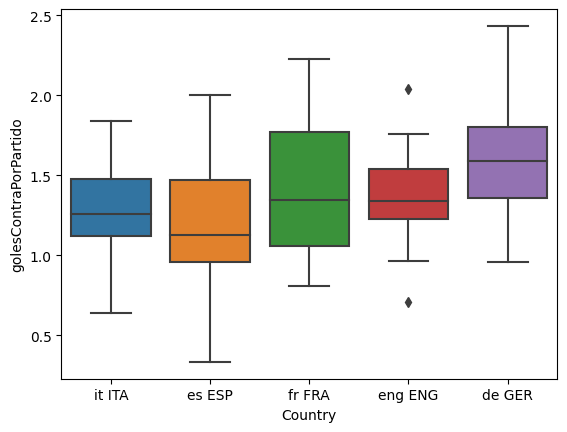

Country
de GER     1.579710
eng ENG    1.356281
es ESP     1.210417
fr FRA     1.419231
it ITA     1.258000
Name: golesContraPorPartido, dtype: float64


In [4]:
df_big5leagues['golesContraPorPartido'] = df_big5leagues.GA/ df_big5leagues.MP
sns.boxplot(x="Country",y="golesContraPorPartido",data=df_big5leagues)
plt.show()

df_avgContraGoalsCountry = df_big5leagues.groupby("Country")["golesContraPorPartido"].mean()
print(df_avgContraGoalsCountry)

Para responder esta pregunta, realizando un analisis por muestreo podemos basarnos el la hipotesis nula que la media de goles en la liga italiana es igual a 2, i como hipotesis alternativa este valor es menor que 2.

Al realizar el ttest vemos que el p-val es mucho menor que 0.05, así que podemos rechazar la hipotesis nula. La media de goles para la liga italiana no es 2, si no que es un numero menor.

In [5]:
test_resultsITA2 = ttest(x=df_big5leaguesITA,y=2,alternative='less')
print(test_resultsITA2)

               T  dof alternative         p-val         CI95%   cohen-d  \
T-test -7.635297   19        less  1.663923e-07  [-inf, 1.43]  1.707304   

             BF10  power  
T-test  9.831e+04    1.0  


Si realizamos el mismo proceso declarando que nuestra hipotesis nula es que la media de goles es 1. Y lo comprobamos, usando como alternativa que es mayor que uno, nos da un p-val de 0.078. Esto nos permite rechazar la hipotesis nula, pero vemos que es un valor no tan bajo como el anterior.

In [6]:
test_resultsITA2 = ttest(x=df_big5leaguesITA,y=1,alternative='greater')
print(test_resultsITA2)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  2.654861   19     greater  0.007818  [1.09, inf]  0.593645  7.076   

           power  
T-test  0.819541  


Esto coincide con lo que se aprecia en las visualizaciones.
Podemos seguir con la siguiente pregunta, haciendo otro analisis por muestreo.

- ¿Se meten menos goles en Italia que en España?

Me voy a basar en la hipotesis (nula), que en España se metan los mismos goles que en Italia.
Mi hipotesis alternativa va a ser que en España se meten mas goles que en Italia.
Para realizar esta comprobacion voy a realizar un Ttest teiendo en cuenta la media de goles por partido.

Hacemos lo mismo a la inversa, usando como hipotesis alternativa que son menos.

In [7]:
test_resultsGreater = ttest(x=df_big5leaguesES,y=df_big5leaguesITA,alternative='greater')
print(test_resultsGreater)

test_resultsLess = ttest(x=df_big5leaguesES,y=df_big5leaguesITA,alternative='less')
print(test_resultsLess)

               T  dof alternative    p-val         CI95%   cohen-d   BF10  \
T-test -0.381333   38     greater  0.64746  [-0.26, inf]  0.120588  0.655   

           power  
T-test  0.021719  
               T  dof alternative    p-val         CI95%   cohen-d   BF10  \
T-test -0.381333   38        less  0.35254  [-inf, 0.16]  0.120588  0.655   

           power  
T-test  0.101995  


Para ambos casos obtenemos un p-val superior al 0.5 por lo tanto no podemos rechazar la hipotesis nula. En España no se meten los mismos goles que en Italia.

- ¿Hay diferencia de goles entre ligas?, ¿en que liga se meten más goles?.

Aqui usamos otro tipo de test, un analisis de varianza, y como hipotesis nula decimos que hay diferencias significativas entre el numero de goles.
El p-value resultante es superior a 0.05 así que no hay suficiente evidencia para decir que hay una diferencia significativa según la liga.

In [9]:
results = anova(data=df_big5leagues, dv='golesPorPartido', between='Country')
print(results)

    Source  ddof1  ddof2         F     p-unc       np2
0  Country      4     93  1.958386  0.107339  0.077688


Viendo las medias podemos ver que la liga que más goles mete es la alemana, con 1.57 goles por partido de media.

In [11]:
print(df_avgGoalsCountry)

Country
de GER     1.579710
eng ENG    1.356728
es ESP     1.210417
fr FRA     1.419231
it ITA     1.258000
Name: golesPorPartido, dtype: float64



- ¿Se están metiendo menos goles en general en las 5 grandes ligas respecto el año pasado?

Cargamos el dataset con los valores para la temporada anterior, y como hipotesis nula establecemos que se marcan los mismos goles en las dos temporadas, 
y como alternativa que se marcan más goles este año.

In [16]:
df_big5leagues_prev = pd.read_csv('futbol2.csv')
df_big5leagues_prev['golesPorPartido'] = df_big5leagues_prev.GF/ df_big5leagues_prev.MP

ttest_res = ttest(x=df_big5leagues['golesPorPartido'], y=df_big5leagues_prev['golesPorPartido'], alternative='greater')
print(ttest_res)

               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -0.730667  194     greater  0.767068  [-0.16, inf]  0.104381  0.399   

           power  
T-test  0.008823  


El p-va es muy superior al 5%, así que no podemos rechazar la hipotesis nula que se marcan los mismos goles. 

In [14]:
print(df_big5leagues_prev['golesPorPartido'].mean())

print(df_big5leagues['golesPorPartido'].mean())

1.4082264484741263
1.3604315973881191
